**Importing standard libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

**Importing the dataset**

In [4]:
dataset = pd.read_csv('Data.csv')

In [5]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB


**Exploratory Data Analysis**

In [7]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
dataset['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

Larger number of observations are recorded for category 2 (almost double) as compared to category 4

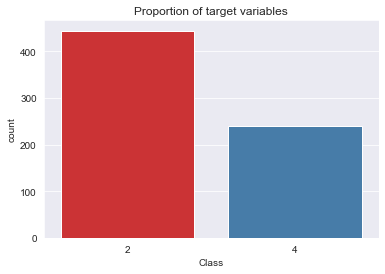

In [9]:
#Visualising the proportion of the target variable
sns.set_style('darkgrid')
sns.countplot(x='Class',data=dataset,palette="Set1")
plt.title('Proportion of target variables')
plt.show()

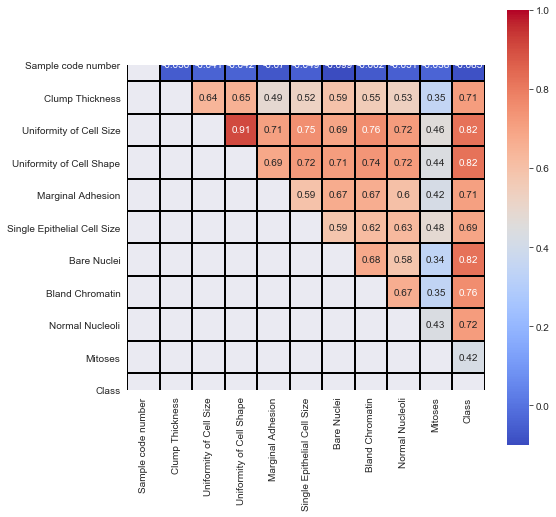

In [10]:
#Visualising correlation between all variables
plt.figure(figsize=(8,8))
correlation = dataset.corr()
matrix = np.tril(correlation)
sns.heatmap(correlation,cmap='coolwarm',square=True,linecolor='black',linewidths=1,
            mask=matrix,annot=True)
plt.show()

**Key Correlation Takeaways**
1. Uniformity of cell size and cell shape is highly correlated
2. Mitoses as a variable has a weak correlaton with all variables
3. The target class variable is most correlated with 3 variables - unfiromity of cell size, unfiromity of cell shape and bare nuclei 

**Data Pre-processing**

In [11]:
X = dataset.drop('Class',axis=1)

In [12]:
X.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [13]:
y = dataset['Class']

In [14]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    4
6    2
7    2
8    2
9    2
Name: Class, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
y = le.fit_transform(y)

In [17]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

**Splitting the dataset into training and testing set**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluation of Different ML Models 

**Model 1 - Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
ln = LogisticRegression(solver='lbfgs',random_state=101)

In [23]:
ln.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
ln_ypred = ln.predict(X_test)

In [25]:
from sklearn import metrics

In [26]:
print(metrics.accuracy_score(y_test,ln_ypred)*100)

97.5609756097561


**Model 2 - KNN**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [29]:
knn_ypred = knn.predict(X_test)

In [30]:
print(metrics.accuracy_score(y_test,knn_ypred)*100)

97.07317073170731


**Model 3 - Linear SVM**

In [31]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear',random_state=101)

In [32]:
svmlinear.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=101,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
svml_ypred = svmlinear.predict(X_test)

In [34]:
print(metrics.accuracy_score(y_test,svml_ypred)*100)

97.5609756097561


**Model 4 - RBF Kernel SVM**

In [35]:
svmrbf = SVC(kernel='rbf',gamma=0.01,random_state=101)

In [36]:
svmrbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
svmr_ypred = svmrbf.predict(X_test)

In [38]:
print(metrics.accuracy_score(y_test,svmr_ypred)*100)

98.04878048780488


**Model 5 - Naive Bayes Classifier**

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [40]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
nb_ypred = nb.predict(X_test)

In [42]:
print(metrics.accuracy_score(y_test,nb_ypred)*100)

95.60975609756098


**Model 6 - Decision Tree Classification**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',random_state=101,max_leaf_nodes=8)

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [45]:
dt_ypred = dtree.predict(X_test)

In [46]:
print(metrics.accuracy_score(y_test,dt_ypred)*100)

94.6341463414634


**Model 7 - Random Forest Classification**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=101)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [49]:
rf_ypred = rf.predict(X_test)

In [50]:
print(metrics.accuracy_score(y_test,rf_ypred)*100)

96.58536585365853


# Conclusion 

In [98]:
print('Accuracy scores:','\n')
print('Logistic Regression:{:>10.2f}'.format(metrics.accuracy_score(y_test,ln_ypred)*100))
print('KNN Classifier:{:>15.2f}'.format(metrics.accuracy_score(y_test,knn_ypred)*100))
print('SVM Linear:{:>19.2f}'.format(metrics.accuracy_score(y_test,svml_ypred)*100))
print('SVM RBF:{:>22.2f}'.format(metrics.accuracy_score(y_test,svmr_ypred)*100))
print('Naive Bayes Classifier:{:>7.2f}'.format(metrics.accuracy_score(y_test,nb_ypred)*100))
print('Decision Tree:{:>16.2f}'.format(metrics.accuracy_score(y_test,dt_ypred)*100))
print('Random Forests:{:>15.2f}'.format(metrics.accuracy_score(y_test,rf_ypred)*100))

Accuracy scores: 

Logistic Regression:     97.56
KNN Classifier:          97.07
SVM Linear:              97.56
SVM RBF:                 98.05
Naive Bayes Classifier:  95.61
Decision Tree:           94.63
Random Forests:          96.59


**Best model**
1. Without doing any feature selection, we were able to obtain a classification accuracy above 90% in all ML models
2. Considering accuracy score as the performance evaluation metric, we identify the top 3 models as follows - **SVM RBF**, SVM Linear and Logistic Regression